In [639]:
# Yeni Baseline Modeller ve Teknikler için kütüphaneler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
RFE_N_FEATURES = 10
svc_params = dict(max_iter=4000, random_state=42, class_weight='balanced', dual=False)
svc_classifier_params = dict(
    kernel='linear', 
    probability=True, 
    max_iter=4000, 
    random_state=42, 
    class_weight='balanced'
)

In [640]:
# Grafik ayarları
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [641]:
# Veri setinin okunması
df = pd.read_csv('Hotel Reservations.csv')

# **Exploratory Data Analysis**

In [642]:
# Veri seti hakkında genel bilgiler
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [643]:
# Sayısal sütunların istatistiksel özeti
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [644]:
# Veri setinin boyutları
df.shape

(36275, 19)

In [645]:
# İlk 5 satırın kontrol edilmesi
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [646]:
# Son 5 satırın kontrol edilmesi
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [647]:
# Eksik değer kontrolü
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [648]:
# Tüm featurelar
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [649]:
# Featureların kaç farklı değer içerdiği kontrolü
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [650]:
# Tekrar eden satırların (duplicate) kontrolü
duplic = df.duplicated().sum()
print(f"Tekrar eden kayıt sayısı: {duplic}")

Tekrar eden kayıt sayısı: 0


In [651]:
# Mantıksal hata kontrolü: Hem yetişkin hem çocuk sayısının 0 olduğu kayıtlar mantıksızdır
filtre = (df['no_of_adults'] == 0) & (df['no_of_children'] == 0)
print(f"Hatalı kayıt sayısı: {len(df[filtre])}")

Hatalı kayıt sayısı: 0


In [652]:
# Hedef değişkenin (Booking Status) dağılım oranları
df['booking_status'].value_counts(normalize=True)

booking_status
Not_Canceled    0.672364
Canceled        0.327636
Name: proportion, dtype: float64

In [653]:
# Kategorikal veriler
cat_columns = df.select_dtypes(include='object').columns.tolist()
print(cat_columns)

['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


In [654]:
# Nümerik veriler
num_columns = df.select_dtypes(include='number').columns.tolist()
print(num_columns)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


# **Veri Görselleştirme**

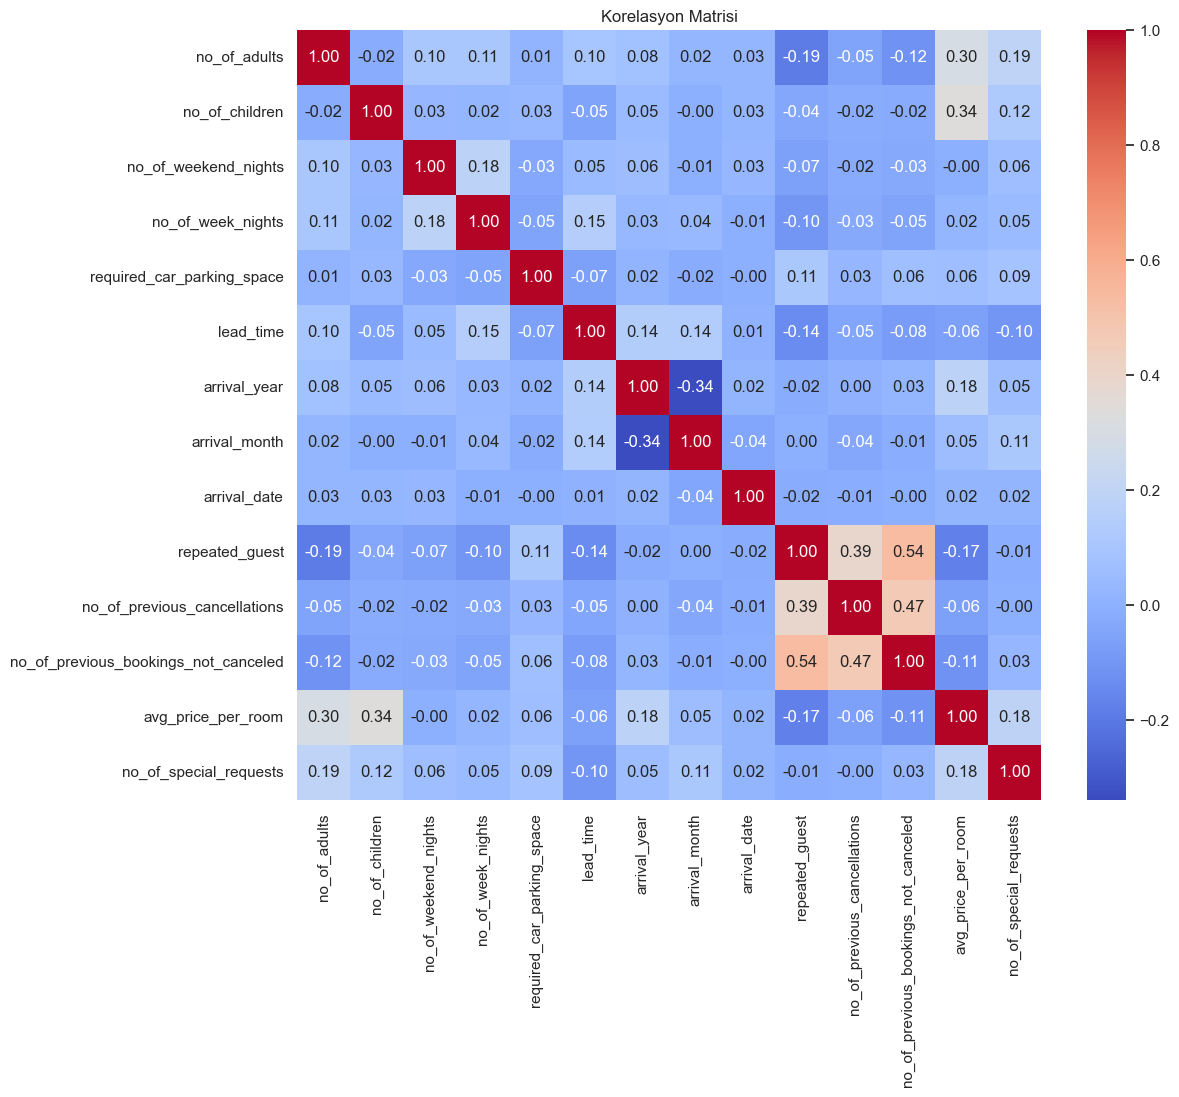

In [655]:
# Sayısal değişkenler arasındaki korelasyon haritası
plt.figure(figsize=(12, 10))
sns.heatmap(df[num_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()

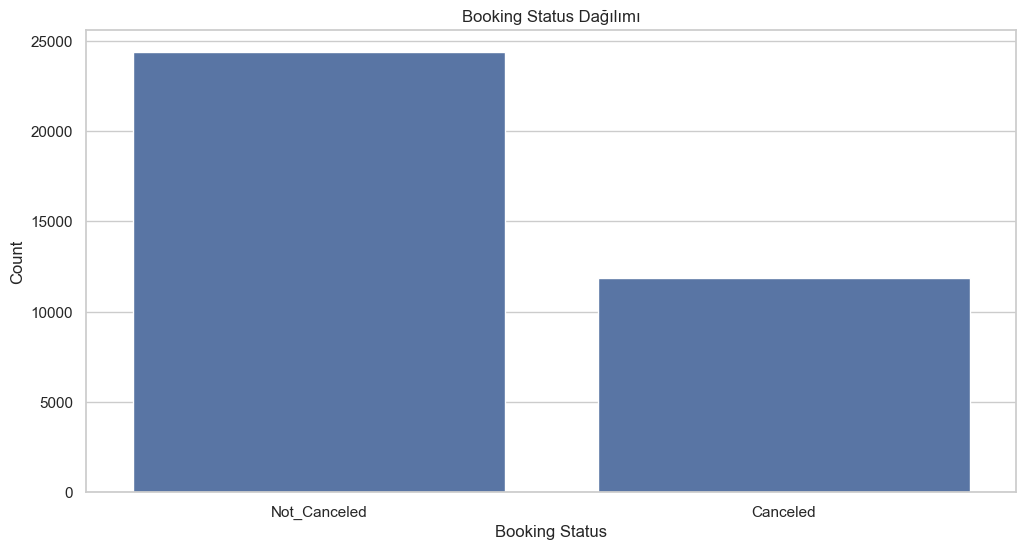

In [656]:
# Rezervasyon iptal durumunun (Target) görselleştirilmesi
sns.countplot(data=df, x='booking_status')
plt.title("Booking Status Dağılımı")
plt.xlabel("Booking Status")
plt.ylabel("Count")
plt.show()

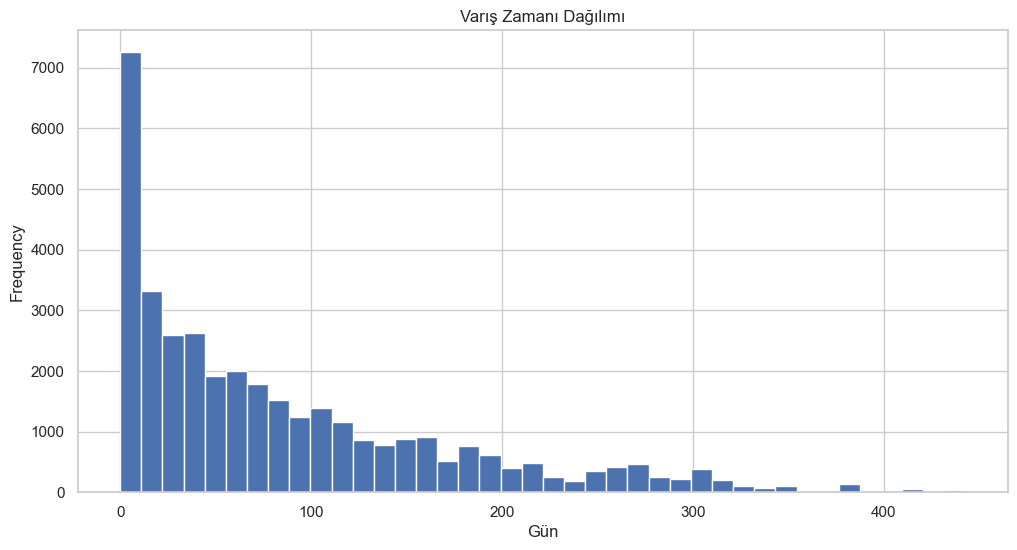

In [657]:
# Rezervasyonun yapıldığı tarih ile otele giriş tarihi arasında geçen gün sayısı
df['lead_time'].plot(kind='hist', bins=40)
plt.title("Varış Zamanı Dağılımı")
plt.xlabel("Gün")
plt.show()

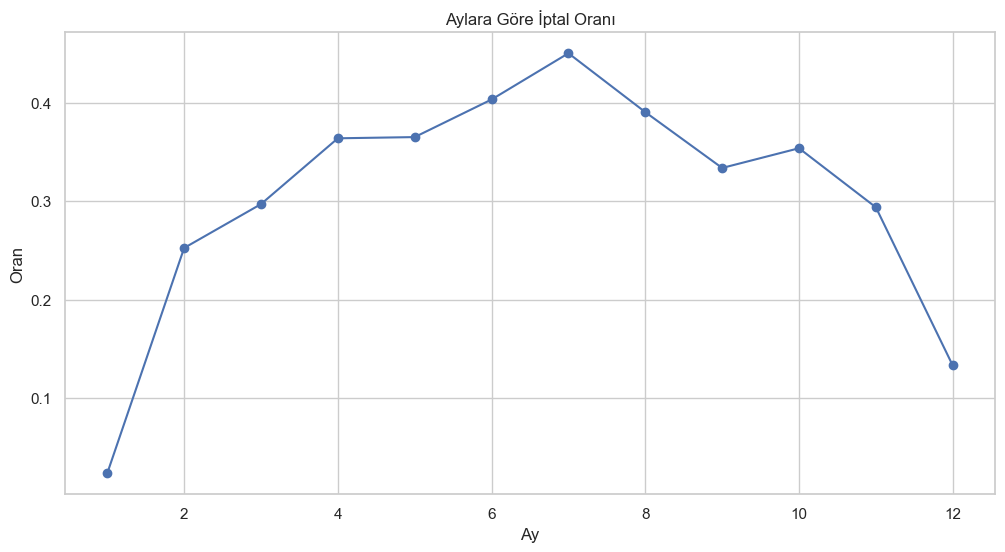

In [658]:
# Aylara göre iptal oranı
monthly_cancel = (df.assign(is_cancel=(df['booking_status']=='Canceled').astype(int))
                    .groupby('arrival_month')['is_cancel'].mean())
monthly_cancel.plot(kind='line', marker='o')
plt.title("Aylara Göre İptal Oranı")
plt.xlabel("Ay")
plt.ylabel("Oran")
plt.show()

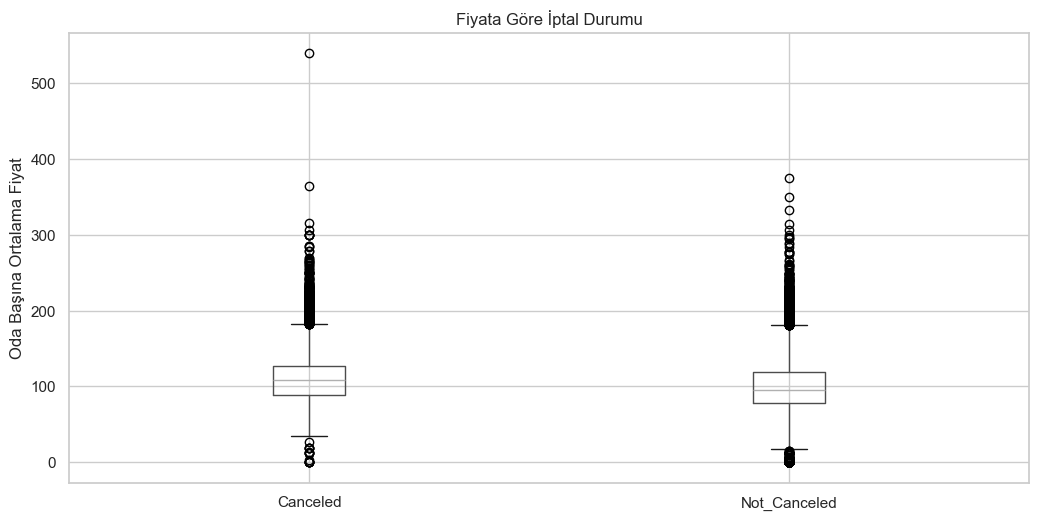

In [659]:
# Fiyata göre iptal oranı
df.boxplot(column='avg_price_per_room', by='booking_status')
plt.suptitle("")
plt.title("Fiyata Göre İptal Durumu")
plt.xlabel("")
plt.ylabel("Oda Başına Ortalama Fiyat")
plt.show()

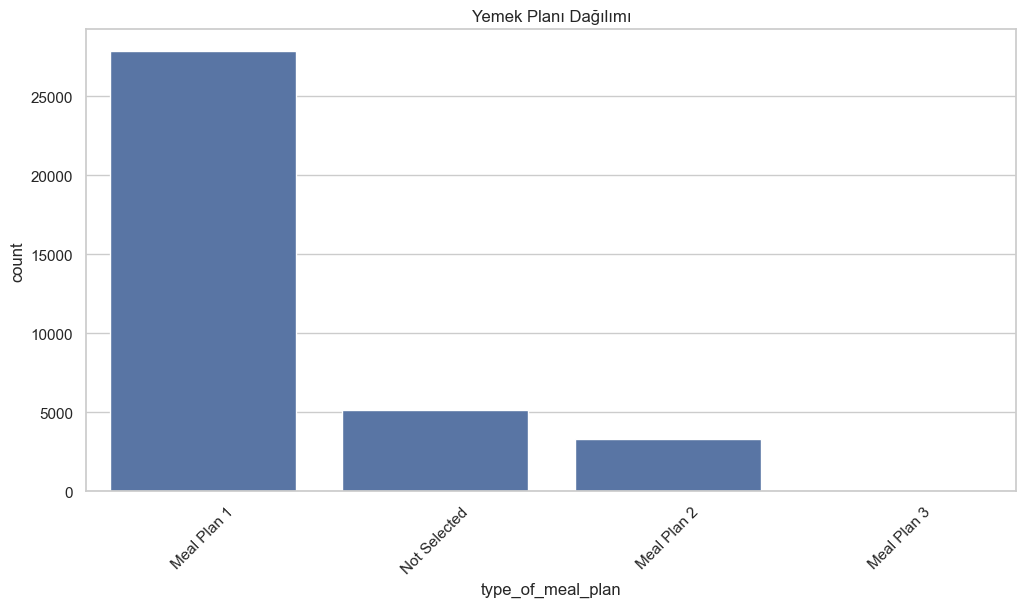

In [660]:
# Yemek planı dağılımı
sns.countplot(data=df, x='type_of_meal_plan')
plt.title("Yemek Planı Dağılımı")
plt.xticks(rotation=45)
plt.show()

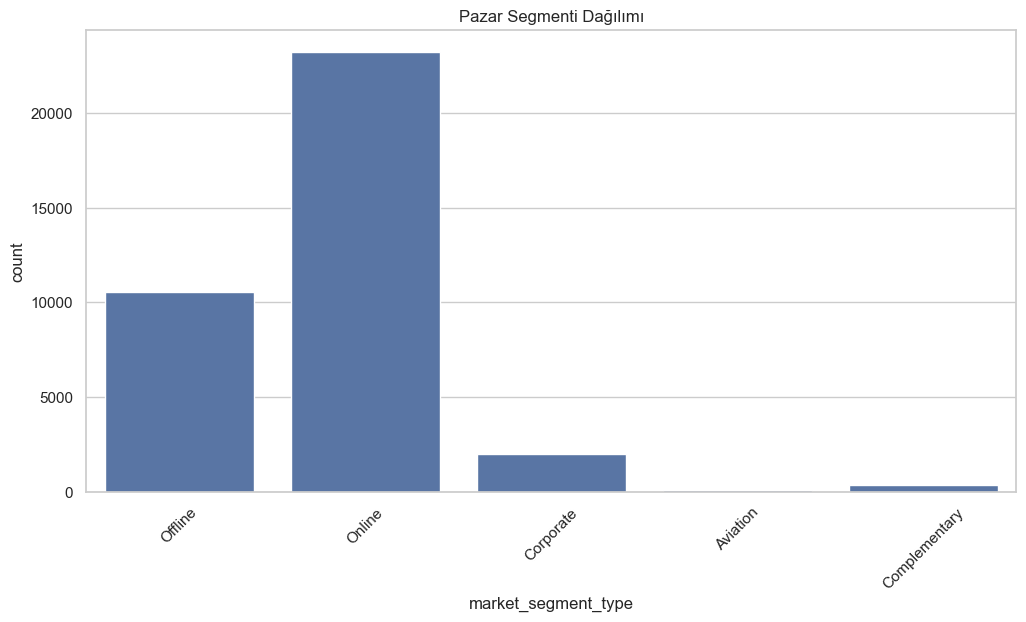

In [661]:
# Pazar segmenti dağılımı
sns.countplot(data=df, x='market_segment_type')
plt.xticks(rotation=45)
plt.title("Pazar Segmenti Dağılımı")
plt.show()

# **Aykırı Değer Analizi**

Text(0.5, 1.0, 'Oda Fiyatı Aykırı Değerleri')

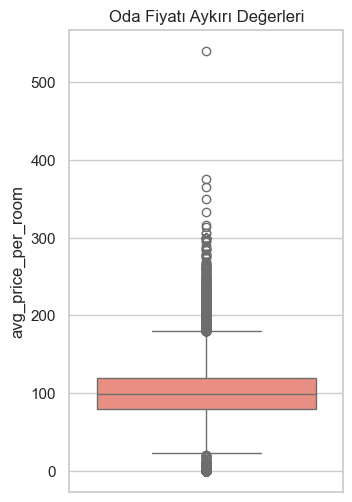

In [662]:
# Oda fiyatları outlier
plt.subplot(1, 3, 1)
sns.boxplot(y=df['avg_price_per_room'], color='salmon')
plt.title('Oda Fiyatı Aykırı Değerleri')

Text(0.5, 1.0, 'Bekleme Süresi (Lead Time) Aykırı Değerleri')

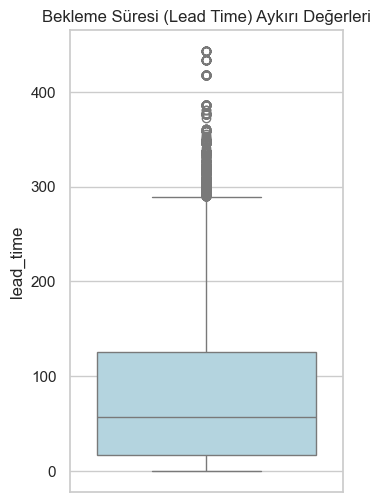

In [663]:
# Bekleme süresi outlier
plt.subplot(1, 3, 2)
sns.boxplot(y=df['lead_time'], color='lightblue')
plt.title('Bekleme Süresi (Lead Time) Aykırı Değerleri')

Text(0.5, 1.0, 'Çocuk Sayısı Aykırı Değerleri')

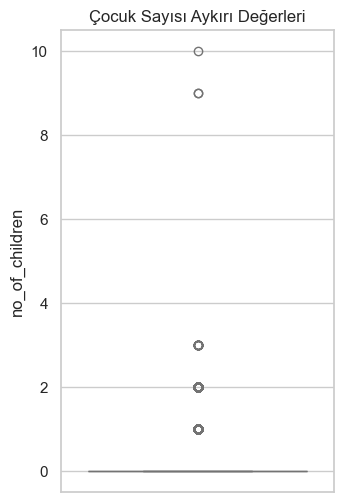

In [664]:
# Çocuk sayısı outlier
plt.subplot(1, 3, 3)
sns.boxplot(y=df['no_of_children'], color='lightgreen')
plt.title('Çocuk Sayısı Aykırı Değerleri')

# **Feature Engineering**

In [665]:
# Fiyatı 0 olan kayıtların temizlenmesi
zero_price = df[df['avg_price_per_room'] == 0]
print("Number of rows with a price of 0:", len(zero_price))
df = df[df['avg_price_per_room'] > 0]

Number of rows with a price of 0: 545


In [666]:
# Model için gereksiz olan ID sütununun düşürülmesi
df = df.drop('Booking_ID', axis=1)

In [667]:
# Toplam gece sayısı ve toplam kişi sayısı gibi yeni sütunlar ekleniyor
df['total_nights'] = df['no_of_week_nights'] + df['no_of_weekend_nights']
df['total_people'] = df['no_of_adults'] + df['no_of_children']

# **Train-Test Split**

In [668]:
# Hedef değişken ve bağımsız değişken
X = df.drop('booking_status', axis=1)
y = df['booking_status']
# Hedef değişkenin sayısal değere dönüştürülmesi
le = LabelEncoder()
y = le.fit_transform(y)
# Verinin %80 eğitim, %20 test olarak ayrılması(target dengesiz olduğu stratify = y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100, stratify = y)

# **Cross-Validation ile Modelleri Değerlendirmek İçin Fonksiyon**

In [669]:
def evaluate_model(pipeline, X_train, y_train, X_test, y_test, model_name='Model Name'):

    # Cross-Validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scoring = {'roc_auc': 'roc_auc', 'f1': 'f1_weighted', 'recall': 'recall_weighted', 'precision': 'precision_weighted'}
    cv_results = cross_validate(pipeline, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)

    # Test Set Evaluation
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                annot_kws={"size": 14}, linewidths=0.5)
    plt.title(f'{model_name} - Confusion Matrix', fontsize=14)
    plt.xlabel('Predicted', fontsize=11)
    plt.ylabel('Actual', fontsize=11)
    plt.show()

    return {
        'Model': model_name,

        # Test Seti Skorları (Tek seferlik test)
        'Test F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Test Recall': recall_score(y_test, y_pred, average='weighted'),
        'Test Precision': precision_score(y_test, y_pred, average='weighted'),
        'Test ROC-AUC': roc_auc_score(y_test, y_prob),

        # Cross Validation Skorları (Ortalama Performans)
        'CV Mean F1': cv_results['test_f1'].mean(),
        'CV Mean Recall': cv_results['test_recall'].mean(),
        'CV Mean Precision': cv_results['test_precision'].mean(),
        'CV Mean ROC-AUC': cv_results['test_roc_auc'].mean()
    }

# **Preprocessor**

In [670]:
# Eğitim setindeki kategorik ve sayısal sütunların belirlenmesi
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'O']
numeric_cols = [col for col in X_train.columns if X_train[col].dtype != 'O']

In [671]:
# Sayısal veriler için Standartlaştırma (StandardScaler)
# Kategorik veriler için One-Hot Encoding (OneHotEncoder) işlemi
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ]
)

# K-Nearest Neighbors (KNN) 

# **1.Sadece Preprocessing**

In [672]:
pipeline_knn_base = Pipeline([
    ('preprocessor', preprocessor),
    # n_neighbors=5 varsayılan olarak kullanılır. Ağırlıklandırma (weights) 'uniform' olarak ayarlanmıştır.
    ('classifier', KNeighborsClassifier(n_neighbors=5, weights='uniform'))
])

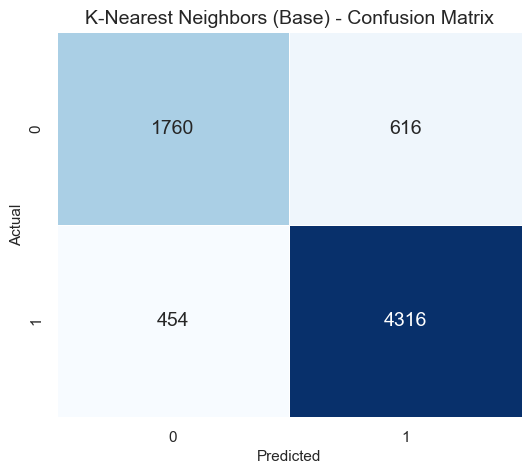

In [673]:
results_knn_base = evaluate_model(
    pipeline_knn_base,
    X_train, y_train,
    X_test, y_test,
    model_name='K-Nearest Neighbors (Base)'
)

In [674]:
all_results = pd.DataFrame([results_knn_base])
print(results_knn_base)

{'Model': 'K-Nearest Neighbors (Base)', 'Test F1 Score': 0.8488736155480435, 'Test Recall': 0.850265883011475, 'Test Precision': 0.848448651615899, 'Test ROC-AUC': np.float64(0.8983205570731776), 'CV Mean F1': np.float64(0.8431550870910032), 'CV Mean Recall': np.float64(0.8442484650092116), 'CV Mean Precision': np.float64(0.8427152656255202), 'CV Mean ROC-AUC': np.float64(0.8946908903750425)}


### **2. Preprocessing + Dimension Reduction(LDA)**

In [675]:
pipeline_knn_lda = Pipeline([
    ('preprocessor', preprocessor),
    ('lda', LDA(n_components=1)),
    ('classifier', KNeighborsClassifier(n_neighbors=5, weights='uniform'))
])

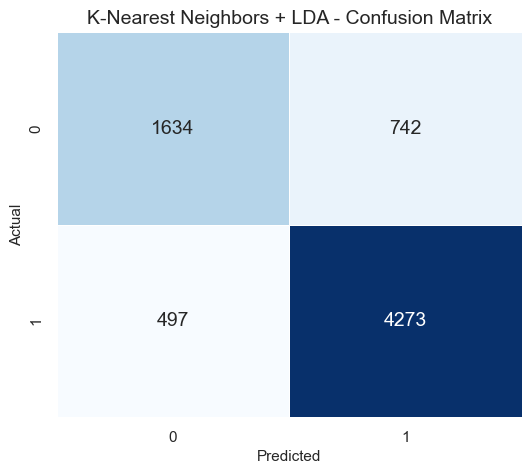

In [676]:
results_knn_lda = evaluate_model(
    pipeline_knn_lda,
    X_train, y_train,
    X_test, y_test,
    model_name='K-Nearest Neighbors + LDA'
)

In [677]:
all_results_LDA = pd.DataFrame([results_knn_lda])
print(results_knn_lda)

{'Model': 'K-Nearest Neighbors + LDA', 'Test F1 Score': 0.8240743483308085, 'Test Recall': 0.8266162888329135, 'Test Precision': 0.8236928927781665, 'Test ROC-AUC': np.float64(0.86981577656368), 'CV Mean F1': np.float64(0.8151509447419325), 'CV Mean Recall': np.float64(0.8170657950769395), 'CV Mean Precision': np.float64(0.8144351664962789), 'CV Mean ROC-AUC': np.float64(0.8669369124068554)}


### **3. Preprocessing + Feature Selection(RFE)**

In [678]:
pipeline_knn_rfe = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', RFE(
        estimator=LinearSVC(**svc_params), 
        n_features_to_select=RFE_N_FEATURES) 
    ), 
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

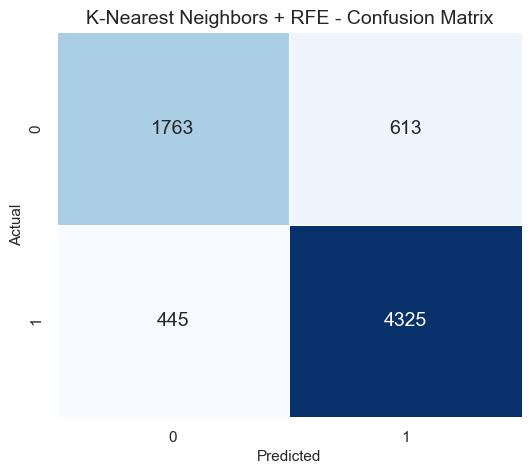

In [679]:
results_knn_rfe = evaluate_model(
    pipeline_knn_rfe, 
    X_train, y_train, 
    X_test, y_test,
    model_name='K-Nearest Neighbors + RFE')

In [680]:
all_results_RFE = pd.DataFrame([results_knn_rfe])
print(results_knn_rfe)

{'Model': 'K-Nearest Neighbors + RFE', 'Test F1 Score': 0.8505131650137026, 'Test Recall': 0.85194514413658, 'Test Precision': 0.8501254843822017, 'Test ROC-AUC': np.float64(0.8999828385179538), 'CV Mean F1': np.float64(0.8404576436667851), 'CV Mean Recall': np.float64(0.8424296412318215), 'CV Mean Precision': np.float64(0.8402085492923703), 'CV Mean ROC-AUC': np.float64(0.8895662095078777)}


### **4. Preprocessing + Feature Selection(RFE) + Dimension Reduction (LDA)**

In [681]:
pipeline_knn_rfe_lda = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', RFE(
        estimator=LinearSVC(**svc_params), 
        n_features_to_select=RFE_N_FEATURES) 
    ),
    ('lda', LDA(n_components=1)),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

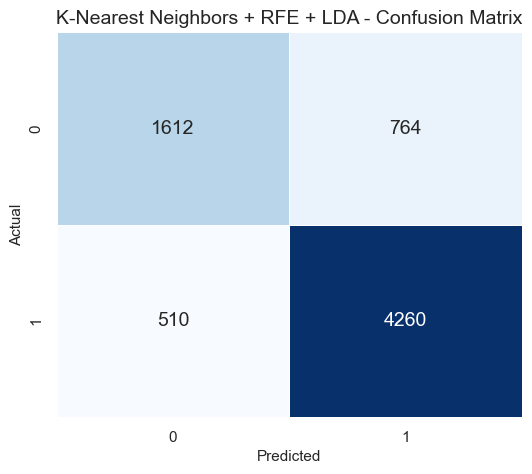

In [682]:
results_knn_rfe_lda = evaluate_model(
    pipeline_knn_rfe_lda, X_train, y_train, X_test, y_test,
    model_name='K-Nearest Neighbors + RFE + LDA'
)

In [683]:
all_results = pd.DataFrame([results_knn_rfe_lda])
print(results_knn_rfe_lda)

{'Model': 'K-Nearest Neighbors + RFE + LDA', 'Test F1 Score': 0.8189965037909084, 'Test Recall': 0.8217184438846907, 'Test Precision': 0.8185809702395708, 'Test ROC-AUC': np.float64(0.8687588675010058), 'CV Mean F1': np.float64(0.8126649575577934), 'CV Mean Recall': np.float64(0.8147215534482563), 'CV Mean Precision': np.float64(0.8119558999778798), 'CV Mean ROC-AUC': np.float64(0.8609000142105403)}


# Gaussian Naive Bayes (GNB)

### **1. Sadece Preprocessing**

In [684]:
pipeline_gnb_base = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB()) 
])

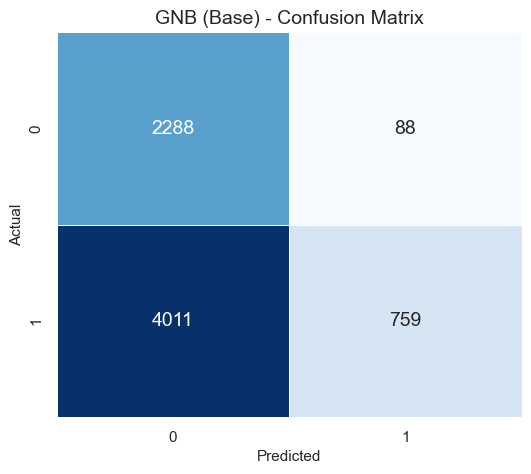

In [685]:
results_gnb_base = evaluate_model(
    pipeline_gnb_base, X_train, y_train, X_test, y_test,
    model_name='GNB (Base)'
)

In [686]:
all_results = pd.DataFrame([results_gnb_base])
print(results_gnb_base)

{'Model': 'GNB (Base)', 'Test F1 Score': 0.3557822928616026, 'Test Recall': 0.4263923873495662, 'Test Precision': 0.7189274324112006, 'Test ROC-AUC': np.float64(0.785646074652888), 'CV Mean F1': np.float64(0.41035293576306187), 'CV Mean Recall': np.float64(0.4712054872256182), 'CV Mean Precision': np.float64(0.7257590311115901), 'CV Mean ROC-AUC': np.float64(0.7869690041749733)}


### **2. Preprocessing + Dimension Reduction(LDA)**

In [687]:
pipeline_gnb_lda = Pipeline([
    ('preprocessor', preprocessor),
    ('lda', LDA(n_components=1)),
    ('classifier', GaussianNB())
])

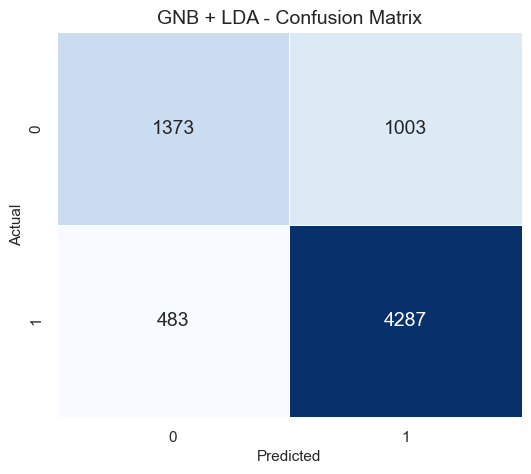

In [688]:
results_gnb_lda = evaluate_model(
    pipeline_gnb_lda, X_train, y_train, X_test, y_test,
    model_name='GNB + LDA'
)

In [689]:
all_results = pd.DataFrame([results_gnb_lda])
print(results_gnb_lda)

{'Model': 'GNB + LDA', 'Test F1 Score': 0.7846502477708021, 'Test Recall': 0.7920514973411699, 'Test Precision': 0.7869116004641421, 'Test ROC-AUC': np.float64(0.8568897394631148), 'CV Mean F1': np.float64(0.7907860244361269), 'CV Mean Recall': np.float64(0.7973693732356066), 'CV Mean Precision': np.float64(0.7926352760305123), 'CV Mean ROC-AUC': np.float64(0.8599801114234825)}


### **3. Preprocessing + Feature Selection(RFE)**

In [690]:
pipeline_gnb_rfe = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', RFE(
        estimator=LinearSVC(**svc_params), 
        n_features_to_select=RFE_N_FEATURES)
    ),
    ('classifier', GaussianNB())
])

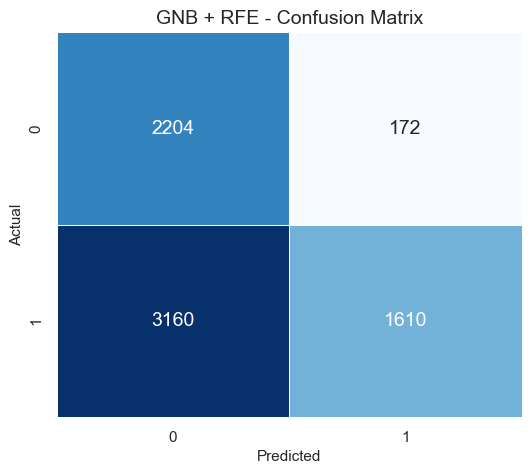

In [691]:
results_gnb_rfe = evaluate_model(
    pipeline_gnb_rfe, X_train, y_train, X_test, y_test,
    model_name='GNB + RFE'
)

In [692]:
all_results = pd.DataFrame([results_gnb_rfe])
print(results_gnb_rfe)

{'Model': 'GNB + RFE', 'Test F1 Score': 0.5174061373639606, 'Test Recall': 0.5337251609291912, 'Test Precision': 0.7396955521930869, 'Test ROC-AUC': np.float64(0.7913374220895185), 'CV Mean F1': np.float64(0.4989036701637885), 'CV Mean Recall': np.float64(0.5427856810002653), 'CV Mean Precision': np.float64(0.7323434240369837), 'CV Mean ROC-AUC': np.float64(0.7974516217721356)}


### **4. Preprocessing + Feature Selection(RFE) + Dimension Reduction (LDA)**

In [693]:
pipeline_gnb_rfe_lda = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', RFE(
        estimator=LinearSVC(**svc_params), 
        n_features_to_select=RFE_N_FEATURES)
    ),
    ('lda', LDA(n_components=1)),
    ('classifier', GaussianNB())
])

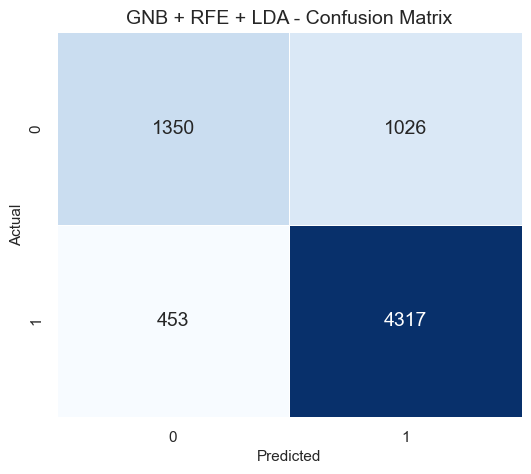

In [694]:
results_gnb_rfe_lda = evaluate_model(
    pipeline_gnb_rfe_lda, X_train, y_train, X_test, y_test,
    model_name='GNB + RFE + LDA'
)

In [695]:
all_results = pd.DataFrame([results_gnb_rfe_lda])
print(results_gnb_rfe_lda)

{'Model': 'GNB + RFE + LDA', 'Test F1 Score': 0.7847052859262329, 'Test Recall': 0.7930310663308144, 'Test Precision': 0.7882824495904384, 'Test ROC-AUC': np.float64(0.8512449353775349), 'CV Mean F1': np.float64(0.7848787904640522), 'CV Mean Recall': np.float64(0.793206332310557), 'CV Mean Precision': np.float64(0.7885683602741247), 'CV Mean ROC-AUC': np.float64(0.8522764171884811)}


# **Sonuçlar Tablosu**

In [696]:
# Sonuçlar
all_results = pd.DataFrame([
    results_knn_base,
    results_knn_lda,
    results_knn_rfe,
    results_knn_rfe_lda,
    results_gnb_base,
    results_gnb_lda,
    results_gnb_rfe,
    results_gnb_rfe_lda
])

# F1 Score değerine göre sıralama
comparison_df = all_results.sort_values(by='Test F1 Score', ascending=False).reset_index(drop=True)

# Görsel Kısım
comparison_df.style.background_gradient(
    cmap='YlOrRd',
    subset=[
        'Test F1 Score', 'Test Recall', 'Test Precision', 'Test ROC-AUC',
        'CV Mean F1', 'CV Mean Recall', 'CV Mean Precision', 'CV Mean ROC-AUC'
    ]
).format("{:.4f}", subset=[
        'Test F1 Score', 'Test Recall', 'Test Precision', 'Test ROC-AUC',
        'CV Mean F1', 'CV Mean Recall', 'CV Mean Precision', 'CV Mean ROC-AUC'
])

,Model,Test F1 Score,Test Recall,Test Precision,Test ROC-AUC,CV Mean F1,CV Mean Recall,CV Mean Precision,CV Mean ROC-AUC
0,K-Nearest Neighbors + RFE,0.8505,0.8519,0.8501,0.9000,0.8405,0.8424,0.8402,0.8896
1,K-Nearest Neighbors (Base),0.8489,0.8503,0.8484,0.8983,0.8432,0.8442,0.8427,0.8947
2,K-Nearest Neighbors + LDA,0.8241,0.8266,0.8237,0.8698,0.8152,0.8171,0.8144,0.8669
3,K-Nearest Neighbors + RFE + LDA,0.8190,0.8217,0.8186,0.8688,0.8127,0.8147,0.8120,0.8609
4,GNB + RFE + LDA,0.7847,0.7930,0.7883,0.8512,0.7849,0.7932,0.7886,0.8523
5,GNB + LDA,0.7847,0.7921,0.7869,0.8569,0.7908,0.7974,0.7926,0.8600
6,GNB + RFE,0.5174,0.5337,0.7397,0.7913,0.4989,0.5428,0.7323,0.7975
7,GNB (Base),0.3558,0.4264,0.7189,0.7856,0.4104,0.4712,0.7258,0.7870
